<a href="https://colab.research.google.com/github/LucasMelvin15/machine_learning-projects/blob/main/02_Heart_Disease_Classifier(sklearn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Heart Disease Using Machine Learning

The heart disease dataset provides a comprehensive look into cardiovascular health by analyzing various key attributes, including age, sex, chest pain type (cp), resting blood pressure (trestbps), cholesterol levels (chol), fasting blood sugar (fbs), resting electrocardiographic results (restecg), maximum heart rate achieved (thalach), exercise-induced angina (exang), ST depression induced by exercise relative to rest (oldpeak), the slope of the peak exercise ST segment (slope), number of major vessels (ca), and thalassemia (thal).

#### Problem statement
 Given clinical parameters, can we predict whether or not they have heart disease

### Data dictionary
The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type

  0: Typical angina: chest pain related decrease blood supply to the heart

  1: Atypical angina: chest pain not related to heart

  2: Non-anginal pain: typically esophageal spasms (non heart related)
  
  3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
  * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
  * serum = LDL + HDL + .2 * triglycerides
  * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
  * 0: Nothing to note
  * 1: ST-T Wave abnormality
      * can range from mild symptoms to severe problems
      * signals non-normal heart beat
  * 2: Possible or definite left ventricular hypertrophy
      * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
 * looks at stress of heart during excercise
 * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
 * 0: Upsloping: better heart rate with excercise (uncommon)
 * 1: Flatsloping: minimal change (typical healthy heart)
 * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
 * colored vessel means the doctor can see the blood passing through
 * the more blood movement the better (no clots)
13. thal - thalium stress result
 * 1,3: normal
 * 6: fixed defect: used to be defect but ok now
 * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [ ]:
# Regular EDA and plotting libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


## 1. Load data

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving heart-disease.csv to heart-disease.csv


In [ ]:
uploaded.keys()

dict_keys(['heart-disease.csv'])

In [ ]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_disease.shape # (rows , columns)

(303, 14)

## 2. Data Exploration

In [ ]:
# Check the first 5
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Check the last 5
heart_disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# Check how many of each class there are
heart_disease['target'].value_counts()

,count
target,
1,165
0,138


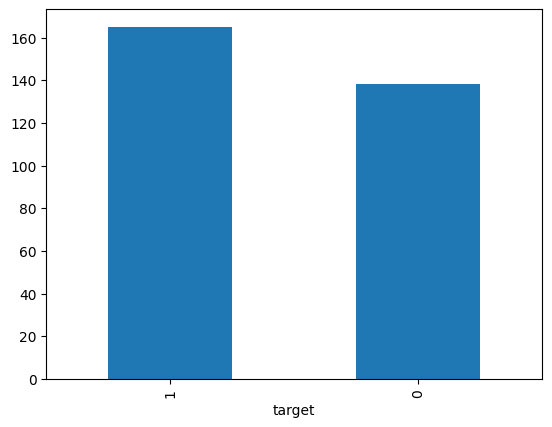

In [ ]:
heart_disease["target"].value_counts().plot(kind="bar");

In [ ]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# check for any missing values
heart_disease.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Heart Disease Frequency according to sex

In [ ]:
heart_disease.sex.value_counts() #sex - (1 = male; 0 = female)

,count
sex,
1,207
0,96


In [ ]:
# compare the target column to the sex column
pd.crosstab(heart_disease.target, heart_disease.sex)

sex,0,1
target,,
0,24,114
1,72,93


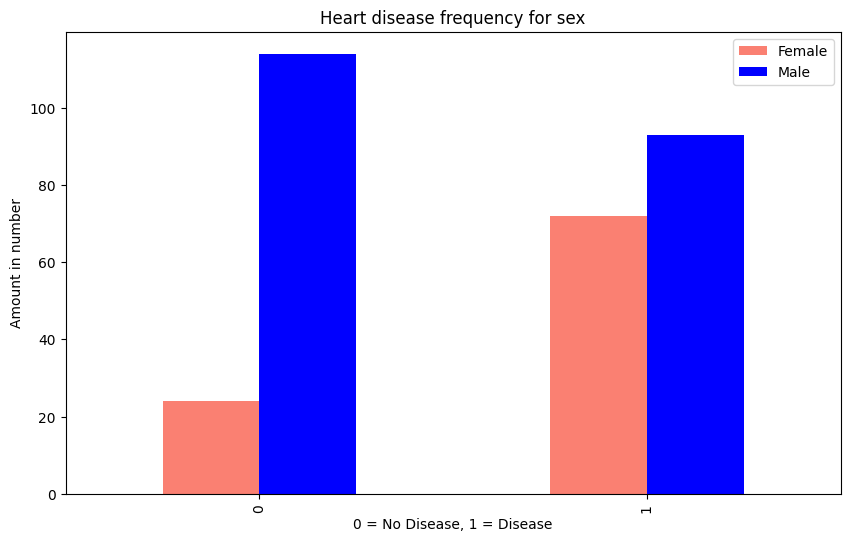

In [ ]:
# Plot the crosstab to compare
pd.crosstab(heart_disease.target, heart_disease.sex).plot(kind="bar",
                                                          figsize=(10,6),
                                                          color=["salmon", "blue"])

plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount in number")
plt.legend(["Female", "Male"]);

#is heart disease more prevalent in men or women?


Age frequency

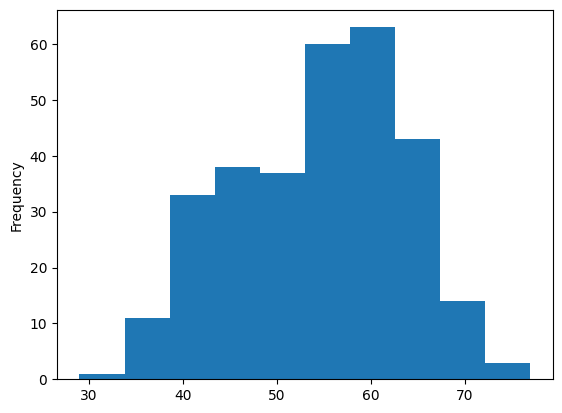

In [ ]:
heart_disease.age.plot.hist();

##### Heart Disease Frequency per Chest Pain type
From the dictionary:

0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

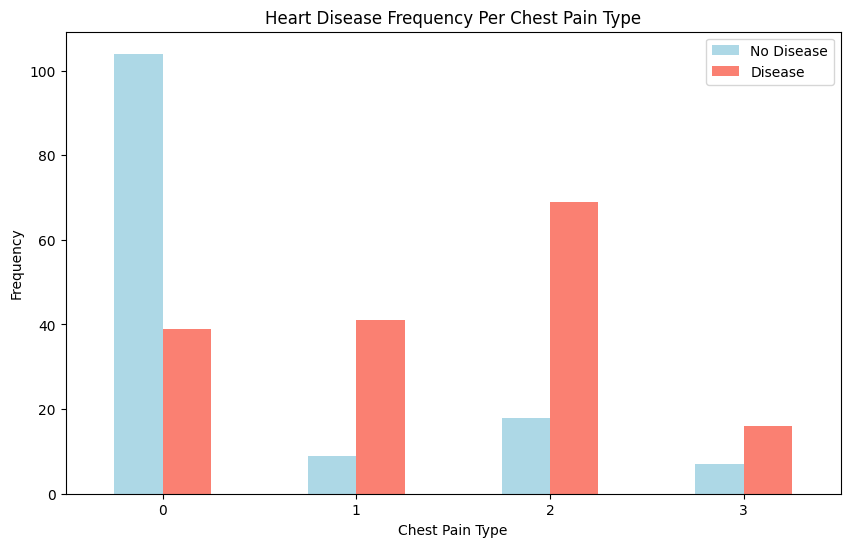

In [ ]:
# Create a new crosstab and base plot
pd.crosstab(heart_disease.cp, heart_disease.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

## 3. Modelling

In [ ]:
# Split data into labels and targets
# Features
X = heart_disease.drop("target", axis=1)

# Target variable
y =  heart_disease.target.values


Training and test split

In [ ]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables
                                                    y, # dependent variable
                                                    test_size = 0.2)



In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(242, 61, 242, 61)

Model choices
1. Logistic Regression - `LogisticRegression()`
2. K-Nearest Neighbors - `KNeighboursClassifier()`
3. RandomForest - `RandomForestClassifier()`

In [ ]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

##### Model comparison

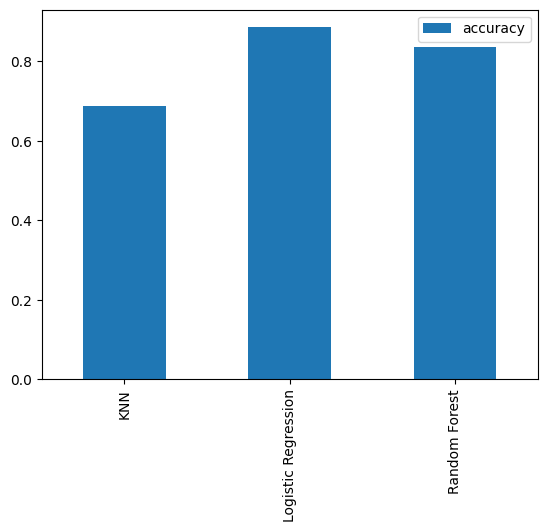

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

## 4. Model Evaluaation

##### Hyperparameter tuning and cross validation

1. Tuning models with RandomizedSearchCV

In [ ]:
# Different logistic regression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [ ]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Using RandomizedSearchCV for RandomForestClassifier

In [ ]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);





Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [ ]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8688524590163934

## 5.Model Evavaluation Metrics beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Precision
* Recall
* F1-score

1. ROC curve and AUC score

In [ ]:
# Make predictions with a tuned model
y_preds = rs_rf.predict(X_test)

In [ ]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
# truth labels comparison
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

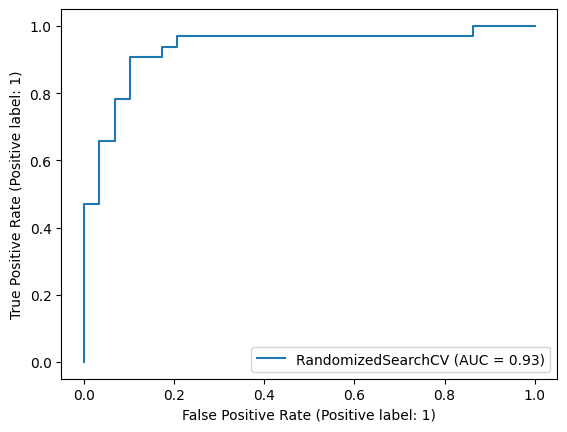

In [ ]:
from sklearn.metrics import RocCurveDisplay

# use a model to plot ROC curve
RocCurveDisplay.from_estimator(estimator=rs_rf,
                               X=X_test,
                               y=y_test)

2. Confusion Matrix

In [ ]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[24  5]
 [ 3 29]]


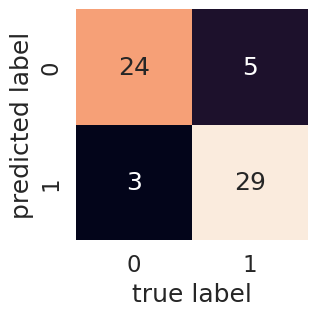

In [ ]:
# Lets visualize it with seaborn's heatmap
# Import seaborn
import seaborn as sns
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
  fig, ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                 annot=True,
                 cbar=False)
  plt.xlabel("true label")
  plt.ylabel("predicted label")

plot_conf_mat(y_test, y_preds)

3. Classification report

In [ ]:
# Show classification report - has been done on only the test data (20%)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



4. Cross validation score

In [ ]:
#check best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [ ]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters
# Instantiate the best model with the best hyperparameters
classifier = RandomForestClassifier(
    n_estimators=210,
    min_samples_split=4,
    min_samples_leaf=19,
    max_depth=3
)

In [ ]:
# Cross-validated accuracy score
cv_acc = cross_val_score(classifier,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.81967213, 0.88333333, 0.78333333])

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8415300546448087

In [ ]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(classifier,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8319032936679995

In [ ]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(classifier,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.8787878787878787

In [ ]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(classifier,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8783246269349128

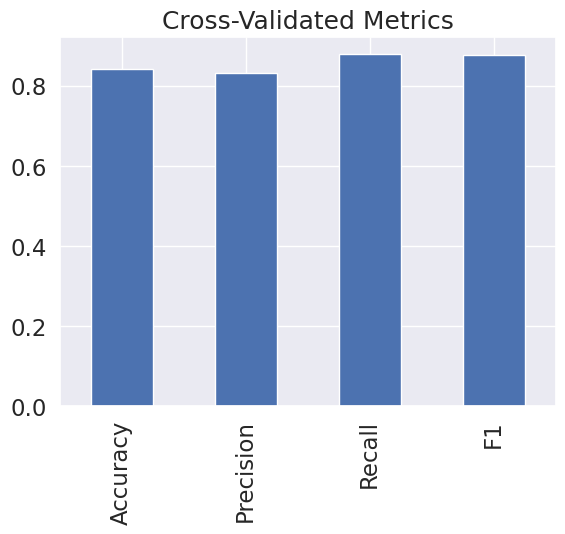

In [ ]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

## 6. Feature Importance
What features contributed to predicting the target variable

In [ ]:
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=19, min_samples_split=4,
                       n_estimators=210)

In [ ]:
# Get the feature importances
importances = classifier.feature_importances_
importances

array([0.05105557, 0.02503883, 0.16256537, 0.01135321, 0.01526288,
       0.        , 0.00507654, 0.07428996, 0.09797146, 0.13340806,
       0.0642429 , 0.19259211, 0.16714311])

In [ ]:
# Match features to columns in a dictionary
features_dict = dict(zip(heart_disease.columns, importances))
features_dict

{'age': 0.051055574428714015,
 'sex': 0.025038834010125164,
 'cp': 0.16256536619757356,
 'trestbps': 0.011353211772642584,
 'chol': 0.015262875461989114,
 'fbs': 0.0,
 'restecg': 0.005076538122084194,
 'thalach': 0.0742899590134003,
 'exang': 0.09797145720573708,
 'oldpeak': 0.13340805915640072,
 'slope': 0.06424289962694658,
 'ca': 0.1925921106671831,
 'thal': 0.16714311433720347}

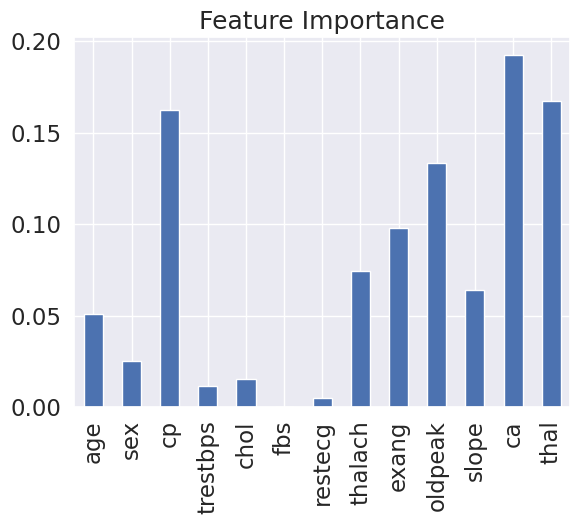

In [ ]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);